In [1]:
from xml.dom import minidom
import xml.etree.ElementTree as ET
import collections
import time
import operator
import matplotlib.pyplot as plt
from tqdm import  tqdm
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

In [2]:
DATABASE="D:\\VeRi_with_plate"
TRAINING_DATASET=DATABASE+"\\image_train"
TEST_DATASET=DATABASE+"\\image_test"

In [3]:
def create_dataset(name_xml_file,name_new_file):
    tree=ET.parse(name_xml_file, parser=ET.XMLParser(encoding='utf-8'))
    root = tree.getroot()
    for elem in root:
        for subelem in elem:
            with open(DATABASE+name_new_file+".txt", "a+") as f:
                f.seek(0)
                data = f.read(100)
                if len(data) > 0:
                    f.write("\n")
                f.write(subelem.attrib['imageName']+" "+subelem.attrib['typeID'])

In [4]:
def count_labels(file):
    """
    Counts the occurrences of labels in the dataset.

    :param labels : a list of the labels in the dataset. There is one label for every sentence.
    :type labels  : list

    :return       : a mapping from classes to the count of their occurences.
    """
    labelCount = collections.defaultdict(int)

    
    file1 = open(file, 'r')
    Lines = file1.readlines()
    # Strips the newline character
    for line in tqdm(Lines):
        label = int(line.split(" ")[1])
        labelCount[label] += 1        

    print()

    return labelCount 

In [5]:
def search_path_of_images(path, n_classes):
    file1 = open(path, 'r')
    Lines = file1.readlines()
    # Strips the newline character
    count=1
    img=[]

    for k in range(n_classes):
        for line in tqdm(Lines):
            label = int(line.split(" ")[1])
            if(label==(k+1)):
                img.append((label,line.split(" ")[0]))
                break
    return img

In [6]:
def showImagesHorizontally(list_of_files,path):
    fig = figure(figsize=(80, 60))
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(path+"/"+list_of_files[i][1])
        imshow(image,cmap='Greys_r')
        axis('off')


In [7]:
create_dataset(DATABASE+'\\train_label.xml',"/training_set")

In [8]:
create_dataset(DATABASE+'\\test_label.xml',"/test_set")

In [9]:
training_distr=count_labels(DATABASE+"\\training_set.txt")

100%|███████████████████████████████████████████████████████████████████████| 75492/75492 [00:00<00:00, 1754801.58it/s]

In [21]:
test_distr=count_labels(DATABASE+"\\test_set.txt")

100%|███████████████████████████████████████████████████████████████████████| 11579/11579 [00:00<00:00, 1655108.41it/s]

100%|███████████████████████████████████████████████████████████████████████| 37746/37746 [00:00<00:00, 1880643.35it/s]


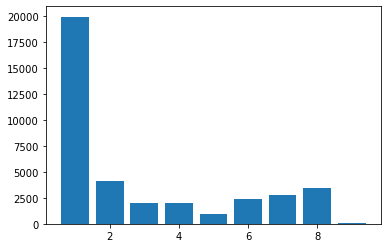

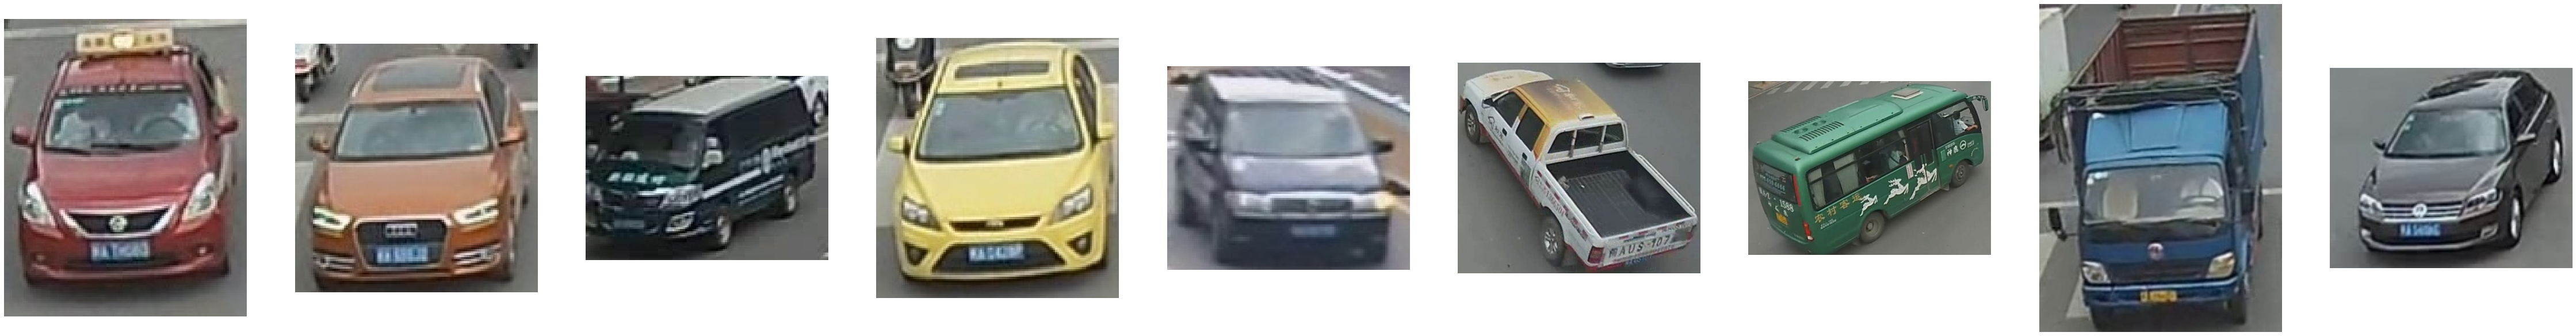

In [22]:
training_images=search_path_of_images(DATABASE+"/training_set.txt", 10)
plt.bar(training_distr.keys(), training_distr.values())
showImagesHorizontally(training_images,TRAINING_DATASET)

100%|███████████████████████████████████████████████████████████████████████| 11579/11579 [00:00<00:00, 1654826.43it/s]


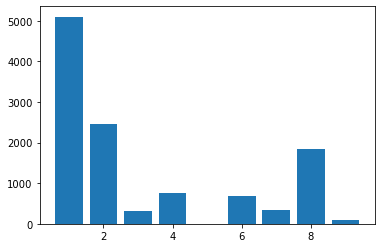

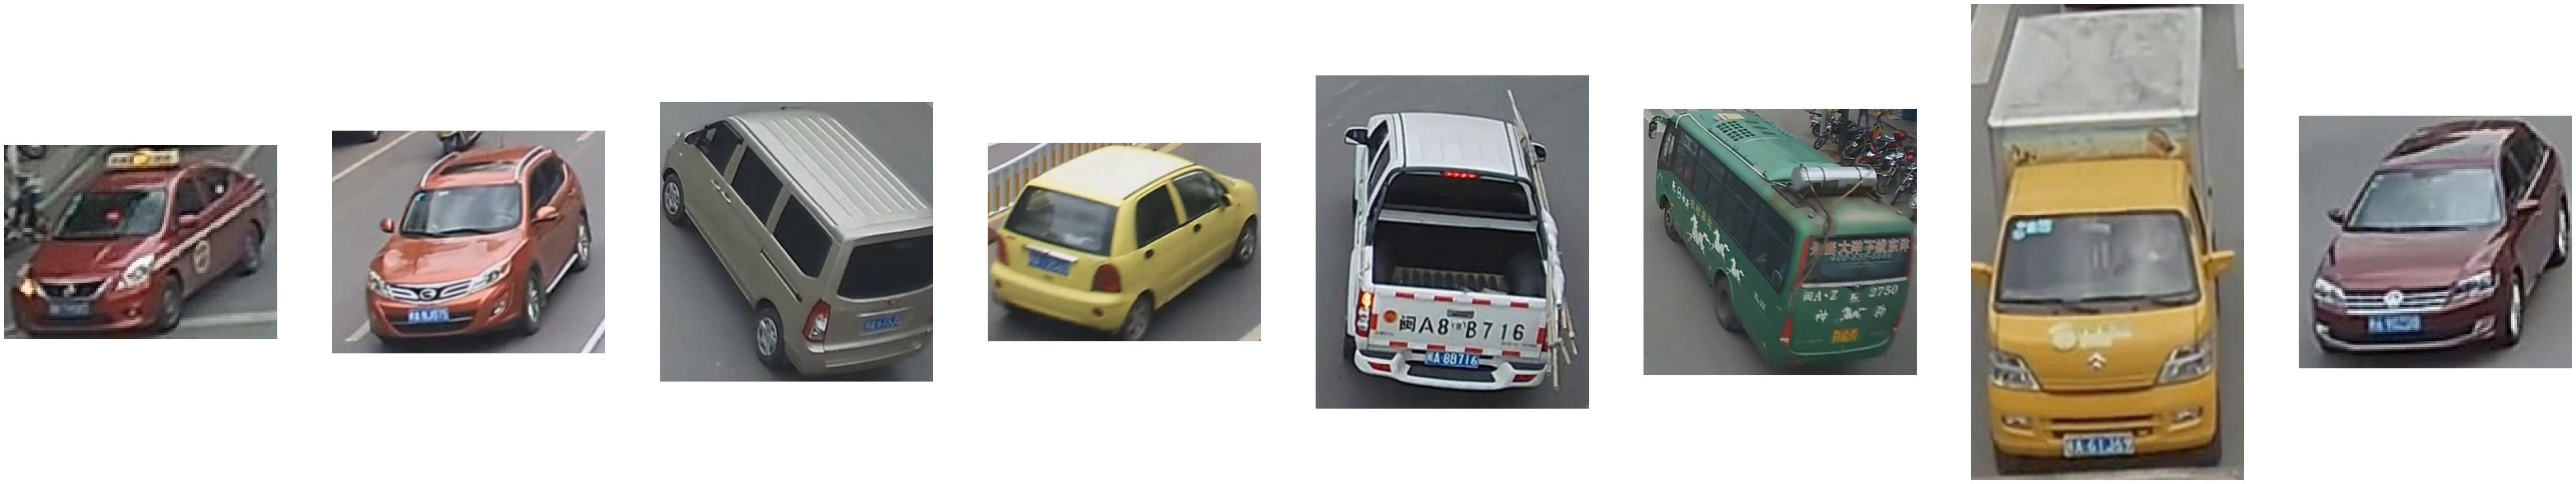

In [25]:
test_images=search_path_of_images(DATABASE+"/test_set.txt", 10)
plt.bar(test_distr.keys(), test_distr.values())
showImagesHorizontally(test_images,TEST_DATASET)

In [26]:
def create_datast(path):
    file1 = open(path, 'r')
    Lines = file1.readlines()
    # Strips the newline character
    count=1
    dataset=[]
    for line in tqdm(Lines):
        label = int(line.split(" ")[1])
        data = line.split(" ")[0] 
        lista=[data,label]
        dataset.append(lista)
    return np.array(dataset)

In [27]:
import numpy as np

a=create_datast(DATABASE+"/training_set.txt")
print(a[0:5])
print(a)

100%|████████████████████████████████████████████████████████████████████████| 37746/37746 [00:00<00:00, 539308.07it/s]

[['0001_c001_00016450_0.jpg' '4']
 ['0001_c001_00016460_0.jpg' '4']
 ['0001_c001_00016470_0.jpg' '4']
 ['0001_c001_00016480_0.jpg' '4']
 ['0001_c001_00016490_0.jpg' '4']]
[['0001_c001_00016450_0.jpg' '4']
 ['0001_c001_00016460_0.jpg' '4']
 ['0001_c001_00016470_0.jpg' '4']
 ...
 ['0769_c019_00075250_0.jpg' '1']
 ['0769_c019_00075255_0.jpg' '1']
 ['0769_c019_00075275_0.jpg' '1']]


In [28]:
DB="D:\\VeRi_with_plate\\database"

In [31]:
import shutil, sys 
OUTPATH = DB


for line in tqdm(a):
    label = int(line[1])
    image = line[0]     
    shutil.copyfile( TRAINING_DATASET+"\\"+image, OUTPATH + "\\"+str(label)+"\\"+image)

100%|███████████████████████████████████████████████████████████████████████████| 37746/37746 [05:19<00:00, 118.15it/s]


In [32]:
b=create_datast(DATABASE+"/test_set.txt")
print(b[0:5])
print(b)

100%|████████████████████████████████████████████████████████████████████████| 11579/11579 [00:00<00:00, 609258.79it/s]

[['0002_c002_00030600_0.jpg' '4']
 ['0002_c002_00030605_1.jpg' '4']
 ['0002_c002_00030615_1.jpg' '4']
 ['0002_c002_00030625_1.jpg' '4']
 ['0002_c002_00030640_0.jpg' '4']]
[['0002_c002_00030600_0.jpg' '4']
 ['0002_c002_00030605_1.jpg' '4']
 ['0002_c002_00030615_1.jpg' '4']
 ...
 ['0776_c007_00000625_0.jpg' '1']
 ['0776_c007_00000630_0.jpg' '1']
 ['0776_c009_00000000_0.jpg' '1']]


In [33]:
import shutil, sys 
OUTPATH = DB


for line in tqdm(b):
    label = int(line[1])
    image = line[0]     
    shutil.copyfile( TEST_DATASET+"\\"+image, OUTPATH + "\\"+str(label)+"\\"+image)

100%|███████████████████████████████████████████████████████████████████████████| 11579/11579 [00:33<00:00, 343.27it/s]
